<a href="https://colab.research.google.com/github/dinesh-umkc/kdm/blob/main/ICP_12_GPT_2_Fine_Tuning_Text_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT-2 Fine-Tuning Tutorial with PyTorch & Huggingface in Colab




#Objective

* Use GPT-2 for text generation
* Explore Sampling Top-K
* Fine Tuning - Genrate fake News



# Setup

In [1]:
!pip install transformers
!pip install datasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 22.3 MB/s 
     |████████████████████████████████| 182 kB 65.0 MB/s 
     |████████████████████████████████| 7.6 MB 53.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 4.3 MB/s 
     |████████████████████████████████| 132 kB 64.0 MB/s 
     |████████████████████████████████| 212 kB 72.8 MB/s 
     |████████████████████████████████| 127 kB 77.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [2]:
import torch, os, re, pandas as pd, json
from sklearn.model_selection import train_test_split
from transformers import DataCollatorForLanguageModeling, DataCollatorWithPadding, GPT2Tokenizer, GPT2LMHeadModel, Trainer, TrainingArguments, AutoConfig
from datasets import Dataset


In [3]:
def pretty_print(text, max_len_line=100):
    words = text.split(' ')
    len_line = 0
    line = ''
    for w in words:
        if w == '\n':
            print(line)
            line = ''
            continue
        if (len(line) + len(w)) > max_len_line:
            print(line)
            line = ''
        line += ' ' + w
    print(line)


In [4]:
# We load the model
base_model = GPT2LMHeadModel.from_pretrained('gpt2-medium')
# options: ['gpt2', 'gpt2-medium', 'gpt2-large', 'gpt2-xl']


Downloading:   0%|          | 0.00/718 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

In [5]:
# We load the tokenizer
base_tokenizer = GPT2Tokenizer.from_pretrained('gpt2-medium')


Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [6]:
text = "Hi, I'm Dinesh and I work as a Software Architect"
base_tokenizer.tokenize(text)


['Hi',
 ',',
 'ĠI',
 "'m",
 'ĠD',
 'ines',
 'h',
 'Ġand',
 'ĠI',
 'Ġwork',
 'Ġas',
 'Ġa',
 'ĠSoftware',
 'ĠArchitect']

In [7]:
text_ids = base_tokenizer.encode(text, return_tensors = 'pt')
text_ids

# tensorflow
#text_ids = base_tokenizer.encode(text, return_tensors = 'tf')


tensor([[17250,    11,   314,  1101,   360,  1127,    71,   290,   314,   670,
           355,   257, 10442, 17340]])

In [8]:
generated_text_samples = base_model.generate(
    text_ids
)
generated_text_samples


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.8/dist-packages/transformers/generation_utils.py:1359: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 20 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


tensor([[17250,    11,   314,  1101,   360,  1127,    71,   290,   314,   670,
           355,   257, 10442, 17340,   379,   257,  1588,  3788,  1664,    13]])

In [9]:
for i, beam in enumerate(generated_text_samples):
    print(f"{i}: {base_tokenizer.decode(beam, skip_special_tokens=True)}")
    print()


0: Hi, I'm Dinesh and I work as a Software Architect at a large software company.



In [10]:
generated_text_samples = base_model.generate(
    text_ids,
    max_length= 100,
)

for i, beam in enumerate(generated_text_samples):
    print(f"{i}: {base_tokenizer.decode(beam, skip_special_tokens=True)}")
    print()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: Hi, I'm Dinesh and I work as a Software Architect at a large software company. I'm also a software engineer and I'm currently working on a project called "The Future of Software".

I'm also a big fan of the Internet and I'm a big fan of open source software.

I'm also a big fan of the Internet and I'm a big fan of open source software.

I'm also a big fan of the Internet and I'm a



#Remove duplicate texts

In [11]:
# text generation example
generated_text_samples = base_model.generate(
    text_ids,
    max_length= 50,  
    num_beams=5,
    no_repeat_ngram_size=2,
    num_return_sequences= 5,
    early_stopping=True 
)

for i, beam in enumerate(generated_text_samples):
  print(f"{i}: {base_tokenizer.decode(beam, skip_special_tokens=True)}")
  print()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


0: Hi, I'm Dinesh and I work as a Software Architect at Google.

I've been a software engineer for over 10 years. I've worked on a wide variety of projects, from web applications to mobile apps, web services,

1: Hi, I'm Dinesh and I work as a Software Architect at Google.

I've been a software engineer for over 10 years. I've worked on a wide variety of projects, from web applications to mobile apps, and have been

2: Hi, I'm Dinesh and I work as a Software Architect at Google.

I've been a software engineer for over 10 years. I've worked on a wide variety of projects, from web applications to mobile apps, web services to

3: Hi, I'm Dinesh and I work as a Software Architect at Google.

I've been a software engineer for over 10 years. I've worked on a wide variety of projects, from web applications to mobile apps, web services and

4: Hi, I'm Dinesh and I work as a Software Architect at Google.

I've been a software engineer for over 10 years. I've worked on a wide variety of projects

#Sampling

In [12]:
# text generation example
generated_text_samples = base_model.generate(
    text_ids,
    max_length= 50,  
    do_sample=True,  
    top_k=0,
    num_return_sequences= 5
)

for i, beam in enumerate(generated_text_samples):
  pretty_print(f"{i}: {base_tokenizer.decode(beam, skip_special_tokens=True)}")
  print()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 0: Hi, I'm Dinesh and I work as a Software Architect for a blockchain than let's say small startup,
 but I have a life which can be scarifying if I make mistakes. So I thought why not build something
 from scratch, right

 1: Hi, I'm Dinesh and I work as a Software Architect at Yinpress. I work with life's everyday
 company problems. More specifically, I care deeply about new ideas.

I have started my career as a
 Search Engine Optimizer

 2: Hi, I'm Dinesh and I work as a Software Architect with AWS. I see my job there is to ensure
 Amazon EC2 is running locally and health of the server can be monitored over the Web. We get to
 match queries and logs

 3: Hi, I'm Dinesh and I work as a Software Architect and plan and create a website ringtail pattern
 for the head metal penny.I have over 25 years of experience by which I can say that I am definitely
 enamoured of this

 4: Hi, I'm Dinesh and I work as a Software Architect for a small manufacturing firm here in
 Bengaluru. I have a Ph

#Use Temperature parameter

In [13]:
# text generation example
generated_text_samples = base_model.generate(
    text_ids,
    max_length= 50,  
    do_sample=True,  
    top_k=0,
    temperature=0.9,
    num_return_sequences= 5
)

for i, beam in enumerate(generated_text_samples):
  pretty_print(f"{i}: {base_tokenizer.decode(beam, skip_special_tokens=True)}")
  print()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 0: Hi, I'm Dinesh and I work as a Software Architect for a large New Orleans accounting firm. Most
 of the customers' business is related to online banking and I am very interested in how to put
 together sophisticated management tools that help make a

 1: Hi, I'm Dinesh and I work as a Software Architect at Voicemail Beta. I look a lot like Dinesh but
 like…different. In my case, the plan isn't necessarily "to be like Dinesh"

 2: Hi, I'm Dinesh and I work as a Software Architect at Microsoft, and I'm a mobile adoption
 advocate for the nonprofit organization, in- memory mobile healthcare organization, and we've been
 serving tiny offices and larger companies with technologies that can

 3: Hi, I'm Dinesh and I work as a Software Architect at IFrame {liddesktop}. I also worked as a
 developer at Thomas Digital in Zurich and we deliver software engineering solutions for clients
 around the world, including desktop applications,

 4: Hi, I'm Dinesh and I work as a Software Architect a

#Top-K Sample

In [14]:
# text generation example
generated_text_samples = base_model.generate(
    text_ids,
    max_length= 50,  
    do_sample=True,  
    top_k=25,
    num_return_sequences= 5
)

for i, beam in enumerate(generated_text_samples):
  pretty_print(f"{i}: {base_tokenizer.decode(beam, skip_special_tokens=True)}")
  print()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


 0: Hi, I'm Dinesh and I work as a Software Architect at a healthcare tech company. I've been doing
 this in my spare time for 8 months so far.

When I was 16 I started a job at a tech startup in

 1: Hi, I'm Dinesh and I work as a Software Architect at a small software company, but I'm interested
 in a wider range of areas. My interest is in how teams are working together, and I really want to be
 able to talk

 2: Hi, I'm Dinesh and I work as a Software Architect for Google. My background is Computer Science,
 but it is very hard for me to leave my current job because I love the project and the challenge. I
 would love your help to

 3: Hi, I'm Dinesh and I work as a Software Architect for a very large IT infrastructure company. My
 job involves many components including database administration, backup, load balancing, and web
 development/web hosting to name a few.

My

 4: Hi, I'm Dinesh and I work as a Software Architect on Microsoft's SQL Server. This post will
 explore what is h

#Fine tuning: Generate fake news

In [15]:
#Gdrive access
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [16]:
filepath= '/content/gdrive/MyDrive/Projects/Data/archive/articles1.csv'
df = pd.read_csv(filepath, encoding = 'utf-8', usecols=['title', 'publication'])\
                    .rename(columns={'title': 'text'})

pd.set_option("display.max_colwidth", None)
df.head(5)

,text,publication
0,House Republicans Fret About Winning Their Health Care Suit - The New York Times,New York Times
1,Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times,New York Times
2,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106 - The New York Times",New York Times
3,"Among Deaths in 2016, a Heavy Toll in Pop Music - The New York Times",New York Times
4,Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile - The New York Times,New York Times


In [17]:
def remove_publication_headline(headline, publication):
    # publication col doesn't match exactly with newspaper in title col
    if str(publication) in str(headline):
        headline = headline.split(' - ')[0]
    return headline

def process_headlines(df, text_colname):
  
    # Remove empty and null rows
    titulo_vacio = (df['text'].str.len() == 0) | df['text'].isna()
    df = df[~titulo_vacio]

    # Remove publication name from title
    df['text'] = df.apply(lambda row: remove_publication_headline(row['text'], row['publication']), axis = 1)

    # Remove headlines with less than 8 words
    titlos_len_ge8 = (df['text'].str.split().apply(lambda x: len(x)) >= 8)
    df = df[titlos_len_ge8]

    # Drop duplicates
    text_df = df.drop_duplicates(subset = [text_colname])\
                [[text_colname]]

    return text_df
    
df = process_headlines(df, 'text')


In [20]:
# the eos and bos tokens are defined
bos = '<|endoftext|>'
eos = '<|EOS|>'
pad = '<|pad|>'

special_tokens_dict = {'eos_token': eos, 'bos_token': bos, 'pad_token': pad}

# the new token is added to the tokenizer
num_added_toks = base_tokenizer.add_special_tokens(special_tokens_dict)

# the model config to which we add the special tokens
config = AutoConfig.from_pretrained('gpt2-medium', 
                                    bos_token_id=base_tokenizer.bos_token_id,
                                    eos_token_id=base_tokenizer.eos_token_id,
                                    pad_token_id=base_tokenizer.pad_token_id,
                                    output_hidden_states=False)

# the pre-trained model is loaded with the custom configuration
base_model = GPT2LMHeadModel.from_pretrained('gpt2-medium', config=config)

# the model embedding is resized
base_model.resize_token_embeddings(len(base_tokenizer))


Embedding(50259, 1024)

In [21]:
df['text'] = bos + ' ' + df['text'] + ' ' + eos

df_train, df_val = train_test_split(df, train_size = 0.9, random_state = 77)
print(f'There are {len(df_train)} headlines for training and {len(df_val)} for validation')


There are 36380 headlines for training and 4043 for validation


In [22]:
# we load the datasets directly from a pandas df
train_dataset = Dataset.from_pandas(df_train[['text']])
val_dataset = Dataset.from_pandas(df_val[['text']])


In [23]:
 def tokenize_function(examples):
        return base_tokenizer(examples['text'], padding=True)


tokenized_train_dataset = train_dataset.map(
    tokenize_function,
    batched=True,
    num_proc=5,
    remove_columns=['text'],
)
tokenized_val_dataset = val_dataset.map(
    tokenize_function,
    batched=True,
    num_proc=5,
    remove_columns=['text'],
)


#0:   0%|          | 0/8 [00:00<?, ?ba/s]

#1:   0%|          | 0/8 [00:00<?, ?ba/s]

#2:   0%|          | 0/8 [00:00<?, ?ba/s]

#3:   0%|          | 0/8 [00:00<?, ?ba/s]

#4:   0%|          | 0/8 [00:00<?, ?ba/s]

#1:   0%|          | 0/1 [00:00<?, ?ba/s]

#2:   0%|          | 0/1 [00:00<?, ?ba/s]

#0:   0%|          | 0/1 [00:00<?, ?ba/s]

#4:   0%|          | 0/1 [00:00<?, ?ba/s]

#3:   0%|          | 0/1 [00:00<?, ?ba/s]

In [24]:
# Example of the result of the tokenization process with padding
base_tokenizer.decode(tokenized_train_dataset['input_ids'][0])


'<|endoftext|> Donald Trump: Hillary Clinton ’Opened the Pandora’s Box of Radical Islam’ <|EOS|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|> <|pad|>'

#Training

In [25]:
model_headlines_path = '/content/gdrive/MyDrive/Projects/Data/archive/model_headlines_news'

training_args = TrainingArguments(
    output_dir=model_headlines_path,          # output directory
    num_train_epochs=6,              # total # of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=200,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir=model_headlines_path,            # directory for storing logs
    prediction_loss_only=True,
    save_steps=10000 
)


In [26]:
data_collator = DataCollatorForLanguageModeling(
        tokenizer=base_tokenizer,
        mlm=False
    )


In [ ]:
trainer = Trainer(
    model=base_model,                         # the instantiated  Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    data_collator=data_collator,
    train_dataset=tokenized_train_dataset,         # training dataset
    eval_dataset=tokenized_val_dataset            # evaluation dataset
)
trainer.train()


The following columns in the training set don't have a corresponding argument in `GPT2LMHeadModel.forward` and have been ignored: __index_level_0__. If __index_level_0__ are not expected by `GPT2LMHeadModel.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 36380
  Num Epochs = 6
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 6822
  Number of trainable parameters = 354825216


Step,Training Loss
500,7.139600


In [ ]:
import os
import time
import datetime
from google.colab import drive

import pandas as pd
import seaborn as sns
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils.data import Dataset, DataLoader, random_split, RandomSampler, SequentialSampler
torch.manual_seed(5600)

from transformers import GPT2LMHeadModel,  GPT2Tokenizer, GPT2TokenizerFast, GPT2Config, GPT2LMHeadModel
from transformers import AdamW, get_linear_schedule_with_warmup

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!nvidia-smi

Thu Nov 17 19:15:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Create Training Set

Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others.

https://huggingface.co/datasets/amazon_us_reviews

In [ ]:
from datasets import load_dataset

datasets = load_dataset("amazon_us_reviews", 'Video_Games_v1_00')

Generating train split:   0%|          | 0/1785997 [00:00<?, ? examples/s]

Dataset amazon_us_reviews downloaded and prepared to /root/.cache/huggingface/datasets/amazon_us_reviews/Video_Games_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
datasets

DatasetDict({
    train: Dataset({
        features: ['marketplace', 'customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 'star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body', 'review_date'],
        num_rows: 1785997
    })
})

In [ ]:
from datasets import ClassLabel, Sequence
import random
import pandas as pd
from IPython.display import display, HTML

def show_random_elements(dataset, num_examples=10):
    assert num_examples <= len(dataset), "Can't pick more elements than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset)-1)
        while pick in picks:
            pick = random.randint(0, len(dataset)-1)
        picks.append(pick)
    
    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        # print(column)

        if isinstance(typ, ClassLabel):
            print(column, typ.names)
            df[column] = df[column].transform(lambda i: typ.names[i])
    # display(HTML(df.to_html()))
    display(df.head(10))
    return df


In [ ]:
sample_df = show_random_elements(datasets['train'], num_examples = 1000)
review_df = sample_df['review_body'].copy()

vine ['N', 'Y']
verified_purchase ['N', 'Y']


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,35249433,R18PICLAQ6MWH6,B000ZKA0J6,39181653,StarCraft II,Video Games,5,8,26,N,N,One of the best games I have ever played.,One of the best games I have ever played. Live...,2010-08-04
1,US,36856952,R7RHKLQOTTVCK,B00C2B2Y9A,79679898,Skullcandy PLYR1 7.1 Surround Sound Wireless G...,Video Games,2,14,15,N,Y,"Good performing product, premature failure.",I bought these in April 2014. I wanted to get...,2014-12-08
2,US,22977797,R3IZMJRZVOOQCL,B003O6EAM6,932135206,Madden NFL 12,Video Games,5,0,0,N,Y,Plays great,"Game plays great for Xbox 360 NFL 2012, son wa...",2012-11-26
3,US,34050016,R21ZGQO4RPZ32P,B000P297JI,596033932,Beautiful Katamari - Xbox 360,Video Games,3,0,0,N,N,"Fun, simple game",I had never played any Katamari games before I...,2008-06-29
4,US,47403032,R158VICH3OTYUQ,B00004U1R1,429143827,The Legend of Zelda: Majora's Mask,Video Games,5,1,1,N,N,Antoher Great One,Ive been hearing a lot of people bad mouth thi...,2000-11-17
5,US,43870039,R2USHX31POOL29,B006QRNKOO,777043907,The Legend of Zelda: Skyward Sword,Video Games,5,0,0,N,Y,Wonderful timing on delivery.,I received my copy of Skyward Sword withint ho...,2013-04-25
6,US,12955507,R33Q6CVA8H1TA4,B00MB6CNN8,692074217,NES30 Game Controller - PC Mac Linux,Video Games,3,0,1,N,Y,Iffy at times for the price.,Interesting functionality. Have to work at it ...,2015-01-19
7,US,50708639,R2M5LTGOPB9KGN,B004PAGJOC,299257891,Dead Island - Xbox 360,Video Games,3,1,10,N,N,Multiplayer is fun,Its good for players your used to working with...,2011-09-07
8,US,2908022,R3SVNDYFZCZH4W,B000GACEHQ,924795171,6-Feet RCA AV Audio/Video Cable for PlayStatio...,Video Games,5,0,0,N,N,fits just right,It got here just as scheduled then it fit real...,2015-07-01
9,US,32720766,RXIGTVHYRA7JP,B00002STFQ,552397598,War Gods,Video Games,4,0,2,N,N,YUGIOH,I LOVED IT IT MADE ME SO HAPPY THAT I GOT IT.I...,2003-03-01


In [ ]:
review_df

0      The gameplay is great, but the menus are extre...
1      This was purchased as a gift for my son.  He a...
2      I ordered this console from amazon warehouse d...
3      I say &quot;attempt&quot; because, right off t...
4      While this expansion pack for Civilization V m...
                             ...                        
995    Will not work with newer xbox 360's Microsoft ...
996                                Writing on cartridge.
997    One of the best games ever created!! 500 hours...
998    No...this is NOT a good game, I don't care wha...
999    Only works some of the time. Instructions said...
Name: review_body, Length: 1000, dtype: object

We need to get an idea of how long our training documents are.

I'm not going to use the same tokenizer as the GPT2 one, which is a [byte pair encoding tokenizer](https://blog.floydhub.com/tokenization-nlp/). Instead, I'm using a simple one just to get a rough understanding.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


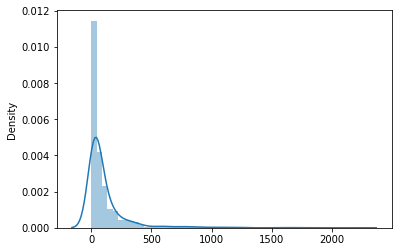

In [ ]:
doc_lengths = []

for review in review_df:

    # get rough token count distribution
    tokens = nltk.word_tokenize(review)

    doc_lengths.append(len(tokens))

doc_lengths = np.array(doc_lengths)

sns.distplot(doc_lengths)

In [ ]:
# the max token length   
len(doc_lengths[doc_lengths > 768])/len(doc_lengths)

0.022

In [ ]:
np.average(doc_lengths)

114.273

Even though these token counts won't match up to the BPE tokenizer's, I'm confident that most bios will be fit under the 768 embedding size limit for the small GPT2 model.

# GPT2 Tokenizer

Although the defaults take care of this,I thought I'd show that you can specify some of the special tokens. 

In [ ]:
# Load the GPT tokenizer.
# tokenizer = GPT2Tokenizer.from_pretrained('gpt2', bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>') #gpt2-small
tokenizer = GPT2TokenizerFast.from_pretrained('gpt2', bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>') #gpt2-small
# tokenizer_medium = GPT2Tokenizer.from_pretrained('gpt2-medium') #gpt2-medium
# tokenizer_large = GPT2Tokenizer.from_pretrained('gpt2-large') #gpt2-large




Downloading:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/665 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
print("The beginning of sequence token {} token has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.bos_token_id), tokenizer.bos_token_id))
print("The end of sequence token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.eos_token_id), tokenizer.eos_token_id))
print("The padding token {} has the id {}".format(tokenizer.convert_ids_to_tokens(tokenizer.pad_token_id), tokenizer.pad_token_id))

The beginning of sequence token <|startoftext|> token has the id 50257
The end of sequence token <|endoftext|> has the id 50256
The padding token <|pad|> has the id 50258


Word Token Embeddings 
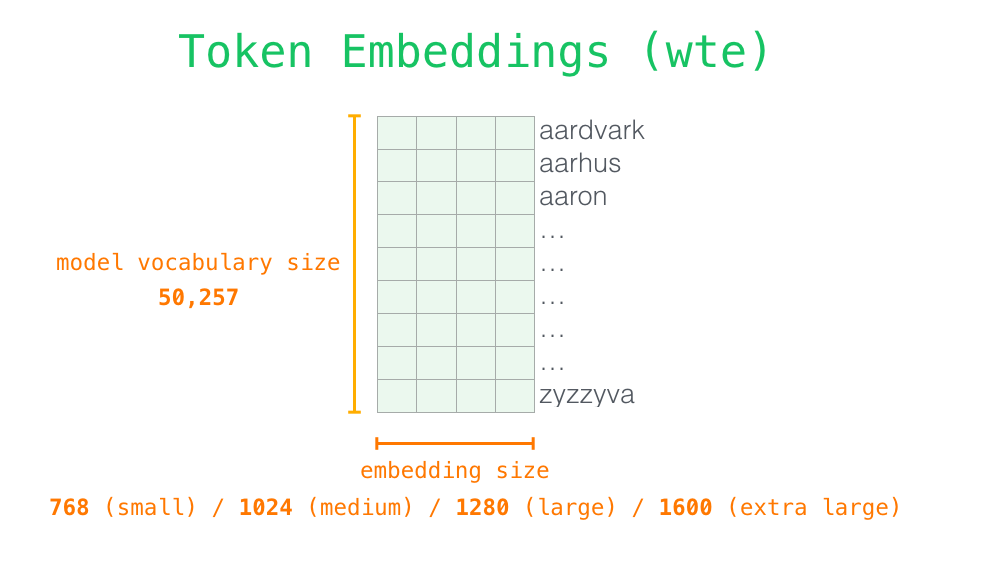

# PyTorch Datasets & Dataloaders


GPT2 is a large model. Increasing the batch size above 2 has led to out of memory problems. This can be mitigated by accumulating the gradients but that is out of scope here.
Read [here](https://huggingface.co/docs/accelerate/usage_guides/gradient_accumulation#:~:text=Gradient%20accumulation%20is%20a%20technique,of%20batches%20have%20been%20performed.)

In [ ]:
batch_size = 2

I'm using the standard PyTorch approach of loading data in using a [dataset class](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).

I'm passing in the tokenizer as an argument but normally I would  instantiate it within the class.

In [ ]:
class GPT2Dataset(Dataset):

  def __init__(self, txt_list, tokenizer, gpt2_type="gpt2", max_length=768):

    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []

    for txt in txt_list:

      encodings_dict = tokenizer('<|startoftext|>'+ txt + '<|endoftext|>', truncation=True, max_length=max_length, padding="max_length")

      self.input_ids.append(torch.tensor(encodings_dict['input_ids']))
      self.attn_masks.append(torch.tensor(encodings_dict['attention_mask']))
    
  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx] 

To understand how I've used the tokenizer, it's worth reading [the docs](https://huggingface.co/transformers/main_classes/tokenizer.html). I've wrapped each bio in the bos and eos tokens.

Every tensor passed to the model should be the same length.

If the bio is shorter than 768 tokens, it will be padded to a length of 768 using the padding token. In addition, an attention mask will be returned that needs to be passed to the model to tell it to ignore the padding tokens. 

If the bio is longer than 768 tokens, it will be truncated without the eos_token. This isn't a problem.

In [ ]:
dataset = GPT2Dataset(review_df, tokenizer, max_length=768)

# Split into training and validation sets
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))

  900 training samples
  100 validation samples


In [ ]:
# Create the DataLoaders for our training and validation datasets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

# Finetune GPT2 Language Model

In [ ]:
# I'm not really doing anything with the config buheret
configuration = GPT2Config.from_pretrained('gpt2', output_hidden_states=False)

# instantiate the model
model = GPT2LMHeadModel.from_pretrained("gpt2", config=configuration)

# this step is necessary because I've added some tokens (bos_token, etc) to the embeddings
# otherwise the tokenizer and model tensors won't match up
model.resize_token_embeddings(len(tokenizer))

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

# Set the seed value all over the place to make this reproducible.
seed_val = 5600

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
# some parameters I cooked up that work reasonably well

epochs = 5
learning_rate = 5e-4
warmup_steps = 1e2
epsilon = 1e-8

# this produces sample output every 100 steps
sample_every = 100

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
optimizer = AdamW(model.parameters(),
                  lr = learning_rate,
                  eps = epsilon #The epsilon is to avoid divide by zero error in the above equation while updating the variable when the gradient is almost zero.
                )

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
# This changes the learning rate as the training loop progresses
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = warmup_steps, 
                                            num_training_steps = total_steps)

In [ ]:
def format_time(elapsed):
    return str(datetime.timedelta(seconds=int(round((elapsed)))))

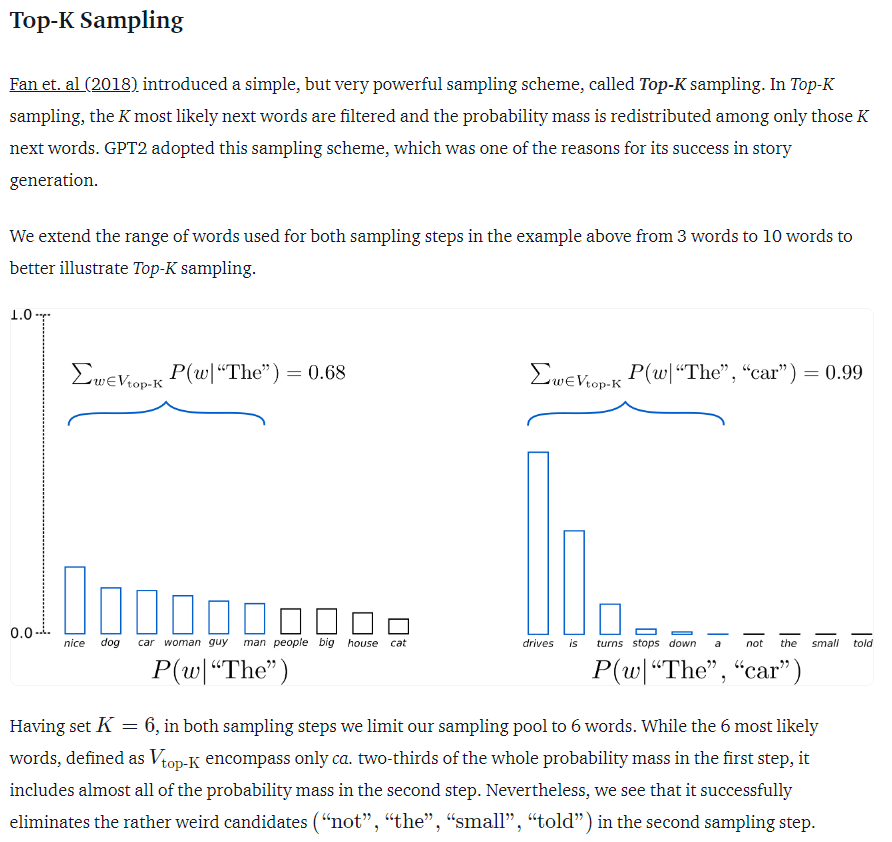

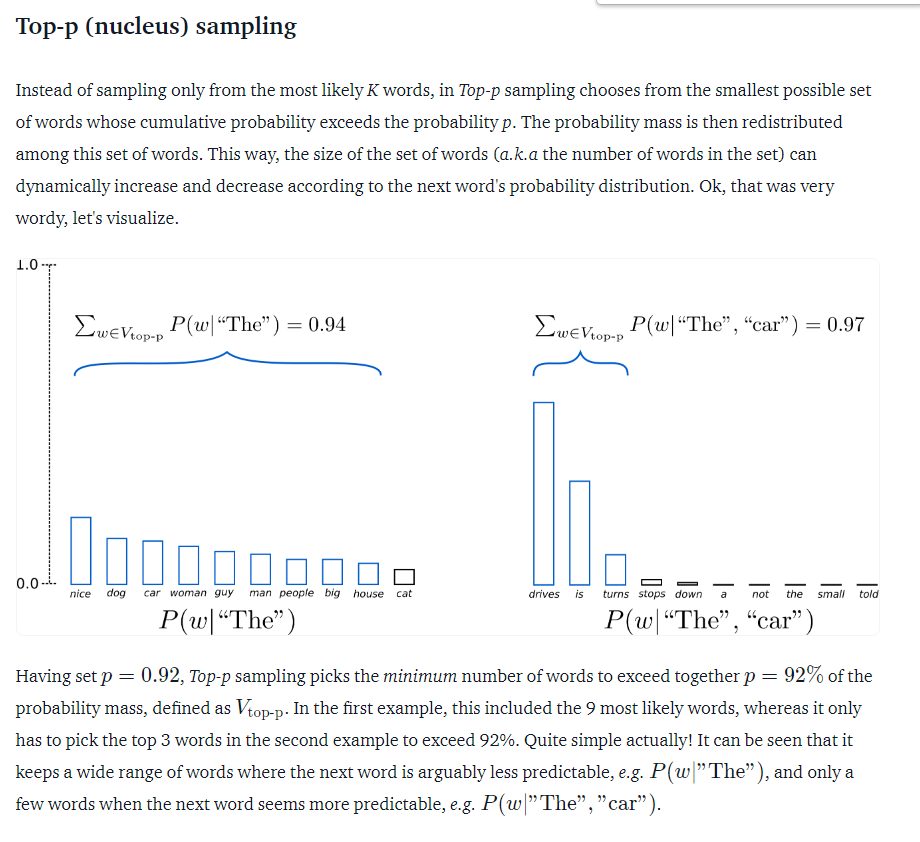

In [ ]:
total_t0 = time.time()

training_stats = []

model = model.to(device)

for epoch_i in range(0, epochs):

    # ========================================
    #               Training
    # ========================================

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    t0 = time.time()

    total_train_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)

        model.zero_grad()        

        outputs = model(  b_input_ids,
                          labels=b_labels, 
                          attention_mask = b_masks,
                          token_type_ids=None
                        )

        loss = outputs[0]  

        batch_loss = loss.item()
        total_train_loss += batch_loss

        # Get sample every x batches.
        if step % sample_every == 0 and not step == 0:

            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}. Loss: {:>5,}.   Elapsed: {:}.'.format(step, len(train_dataloader), batch_loss, elapsed))

            model.eval()

            sample_outputs = model.generate(
                                    do_sample=True,   
                                    top_k=50, 
                                    max_length = 200,
                                    top_p=0.95, 
                                    num_return_sequences=1
                                )
            for i, sample_output in enumerate(sample_outputs):
                  print("{}: {}".format(i, tokenizer.decode(sample_output, skip_special_tokens=True)))
            
            model.train()

        loss.backward()

        optimizer.step()

        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)       
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================

    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval()

    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        b_input_ids = batch[0].to(device)
        b_labels = batch[0].to(device)
        b_masks = batch[1].to(device)
        
        with torch.no_grad():        

            outputs  = model(b_input_ids, 
#                            token_type_ids=None, 
                             attention_mask = b_masks,
                            labels=b_labels)
          
            loss = outputs[0]  
            
        batch_loss = loss.item()
        total_eval_loss += batch_loss        

    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    validation_time = format_time(time.time() - t0)    

    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")
print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    450. Loss: 0.7031928896903992.   Elapsed: 0:00:47.
0:  staged a


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    450. Loss: 0.31241366267204285.   Elapsed: 0:01:38.
0: uitsIn the heart of the


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   300  of    450. Loss: 0.09209952503442764.   Elapsed: 0:02:28.
0: ensonI have the controller built for my PS1. I have been using my wireless adapter and my wireless adapter now it's a problem. The controller is not working as advertised. My wireless adapter is now overpriced. I will not use my wireless adapter if I decide to use it in a wireless connection


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   400  of    450. Loss: 0.6507555246353149.   Elapsed: 0:03:18.
0:  lineWe can't wait to get this game in person, and I will definitely do my best not to review the game because it is not good at all.

  Average training loss: 0.98
  Training epoch took: 0:03:43

Running Validation...
  Validation Loss: 0.62
  Validation took: 0:00:08

======== Epoch 2 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    450. Loss: 0.3192577064037323.   Elapsed: 0:00:50.
0:  legallySo you have a Wii or Classic system and have been using it for a while and it is super hard. I tried it at a local gym where my mom made a big fuss about having to buy some cheap glasses for my glasses so the gym had to change the glasses. The glasses did not work so well. I am completely broke. After 30 seconds of this video I cant sit still or get up to do some other work.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    450. Loss: 0.7399049401283264.   Elapsed: 0:01:41.
0:  lootIt was kind of funny but I've always played it with the PSP and it took a little bit of time for it to work properly. The game has some neat controls and there's a really nice way to run it. The only problem I've noticed is that sometimes I'm not able to get past a certain point where I'm getting stuck on this side of the screen. I wish that the graphics would be better and I've noticed that on some games the screen can sometimes show more life to the player. In some cases when I'm stuck on the screen I want to press the side of my screen to get my screen back up, but that's a little irritating. It also gets me frustrated when a certain level fails or sometimes I find myself hitting something while I'm on the screen. I've tried to get the game out on PS3's XBox Pro support in my PS Store but they're nowhere to be found unless they have a way to get that out on sale.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   300  of    450. Loss: 0.32218262553215027.   Elapsed: 0:02:35.
0:  UsedThe Wii Fit Perfect was a product I couldn't stop using. The cable was smooth and made for me. I used the WiiFitFit Connected XL cord for the Wii, the Fit Connected XL cord for the WiiFit, and the Fit Connected XL cord for the PS4 (for an authentic Playstation 3)<br />Game Station(Game Station is a great peripheral for your console, but can't compete with PS4s for gaming inputs)<br />Fit Station (Game Station is one of the best wired games available at launch)<br />Fit Station (PS4/3)<br />Fit Station(PS4/2)<br />Fit Station (Xbox1)<br />Fit Station (Xbox Connect)<br />Fit Station (Xbox 360)<br />Fit Station (Xbox3)<br />Fit Station (Fit Station/Fit Station Connected XL)<br />Fit Station (Fit Station/Fit Station Connected XL


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   400  of    450. Loss: 0.2705616056919098.   Elapsed: 0:03:28.
0:  leftThe only flaw in this game is that it was packaged in a box with a disc, just as it should have. There's a disc slot to the back that you just plug it in and it doesn't work as you would hope. The controller itself is a little loose in the middle and can't properly control it (it's a minor fault of the controller). A nice design but for the price you're getting for the controller that comes with it, the problem is it's too fast

  Average training loss: 0.45
  Training epoch took: 0:03:54

Running Validation...
  Validation Loss: 0.63
  Validation took: 0:00:08

======== Epoch 3 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    450. Loss: 0.5839095115661621.   Elapsed: 0:00:50.
0:  earnedIt does not come cheap but it is worth it


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    450. Loss: 0.3441731035709381.   Elapsed: 0:01:40.
0:  fantJust for those who like the old school Mario & Metroid style visuals, this game is for you. Its easy to navigate, and you have the freedom of choice. It has a good amount of different levels, and the graphics are very high quality. If you are looking for a challenging and fun title for the Vita, look elsewhere.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   300  of    450. Loss: 0.5683211088180542.   Elapsed: 0:02:32.
0:  forceI can remember playing the original Kirby game.  There are no puzzles or glitches in the game.  There are no online multiplayer or online matches.  The games in these games are not bad.  There are also the fact that some of the songs in the games are glitchy.  I would like to think the developers could have fun with that.  This could have been more fun for me.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   400  of    450. Loss: 0.1322043538093567.   Elapsed: 0:03:22.
0:  SpectThe Last of Us was an awesome game, the quality of the controls was incredible and the cutscenes were outstanding.  It came out perfect and very enjoyable to play.  In fact, I play it daily just to beat it on \\"Resident Evil\\".   I would highly recommend this game to anyone who enjoys stealth games!

  Average training loss: 0.38
  Training epoch took: 0:03:47

Running Validation...
  Validation Loss: 0.65
  Validation took: 0:00:08

======== Epoch 4 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    450. Loss: 0.36820879578590393.   Elapsed: 0:00:50.
0:  significantIt's great on the SNES, but there's a lot of lag that could have been fixed. I found myself skipping music and running into problems trying to play guitar. I've been playing for about 20+ hours straight since I first got the controller, but this game was leaps and bounds away from the one I was expecting. Even if you don't play guitar, you still have a lot of fun with it.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    450. Loss: 0.046201806515455246.   Elapsed: 0:01:40.
0:  aerialI read that Blizzard was going to release Diablo 3 on PC in month of July. To my horror, this didn't happen. It took a few months to figure out how the interface, weapons, and boss fights worked, and then all the fun came to play with Diablo 3.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   300  of    450. Loss: 0.20659136772155762.   Elapsed: 0:02:30.
0:  BidenFun.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   400  of    450. Loss: 0.15913701057434082.   Elapsed: 0:03:19.
0:  resultedThe graphics are okay, the sound quality is ok, there is plenty of voice acting in this game, it is fun, the story is good

  Average training loss: 0.32
  Training epoch took: 0:03:44

Running Validation...
  Validation Loss: 0.69
  Validation took: 0:00:08

======== Epoch 5 / 5 ========
Training...


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   100  of    450. Loss: 0.1695689857006073.   Elapsed: 0:00:50.
0:  NoI bought this for my brother as he's a freshman in high school (he plays a few hours a week). When he watches me do stupid things I get excited and he plays all the time. He keeps telling me how cool my brother is and I love it. I am happy to see that my brother likes it too!


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   200  of    450. Loss: 0.0860341489315033.   Elapsed: 0:01:40.
0:  robotI beat this game at Christmas (actually the day after I bought it) and I still can't put the controller down. I mean, this was the game that the elderly said was the best for kids...but who buys a game like this after seeing how terrible it is? Anyway, the story was great (actually, more of an A-Game for kids) and the puzzles and all around were very well thought out, but it still feels like an after thought game after playing this one for a long time. There is an ebb and flow here, but it's the same old 'game you never thought you would ever play' kind of thing.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   300  of    450. Loss: 0.2671104967594147.   Elapsed: 0:02:31.
0: ilyIt is easy to make but I needed help with the parts so that is good cause i dont have to throw away parts of the wii just to make sure it works well.


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  Batch   400  of    450. Loss: 0.25029006600379944.   Elapsed: 0:03:21.
0:  SometimesJust wish the controller was more slick and smooth.

  Average training loss: 0.27
  Training epoch took: 0:03:45

Running Validation...
  Validation Loss: 0.73
  Validation took: 0:00:08

Training complete!
Total training took 0:19:34 (h:mm:ss)


Let's view the summary of the training process.

In [ ]:
# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

,Training Loss,Valid. Loss,Training Time,Validation Time
epoch,,,,
1,0.98,0.62,0:03:43,0:00:08
2,0.45,0.63,0:03:54,0:00:08
3,0.38,0.65,0:03:47,0:00:08
4,0.32,0.69,0:03:44,0:00:08
5,0.27,0.73,0:03:45,0:00:08


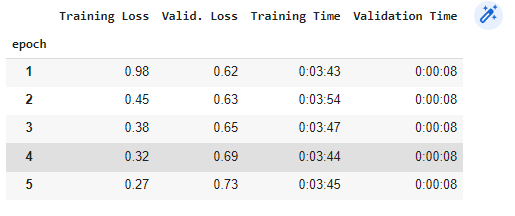

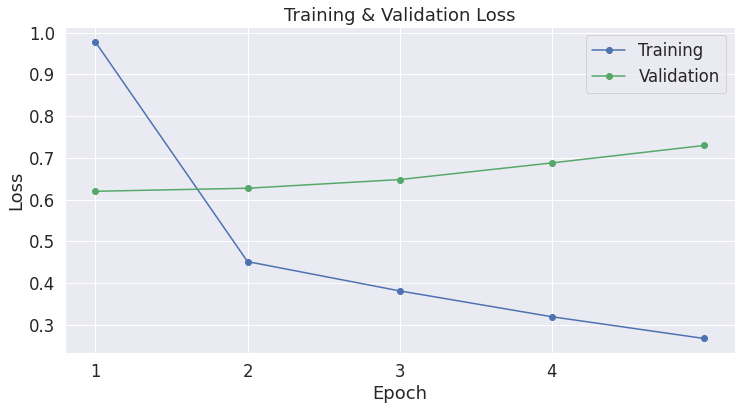

In [ ]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()

# Display Model Info

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The GPT-2 model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:2]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[2:14]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-2:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The GPT-2 model has 148 different named parameters.

==== Embedding Layer ====

transformer.wte.weight                                  (50259, 768)
transformer.wpe.weight                                   (1024, 768)

==== First Transformer ====

transformer.h.0.ln_1.weight                                   (768,)
transformer.h.0.ln_1.bias                                     (768,)
transformer.h.0.attn.c_attn.weight                       (768, 2304)
transformer.h.0.attn.c_attn.bias                             (2304,)
transformer.h.0.attn.c_proj.weight                        (768, 768)
transformer.h.0.attn.c_proj.bias                              (768,)
transformer.h.0.ln_2.weight                                   (768,)
transformer.h.0.ln_2.bias                                     (768,)
transformer.h.0.mlp.c_fc.weight                          (768, 3072)
transformer.h.0.mlp.c_fc.bias                                (3072,)
transformer.h.0.mlp.c_proj.weight                        (3072

# Saving & Loading Fine-Tuned Model


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Saving best-practices: if you use defaults names for the model, you can reload it using from_pretrained()

output_dir = '/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints'

# Create output directory if needed
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Saving model to %s" % output_dir)

# Save a trained model, configuration and tokenizer using `save_pretrained()`.
# They can then be reloaded using `from_pretrained()`
model_to_save = model.module if hasattr(model, 'module') else model  # Take care of distributed/parallel training
model_to_save.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# Good practice: save your training arguments together with the trained model
# torch.save(args, os.path.join(output_dir, 'training_args.bin'))


Saving model to /content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints


('/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints/tokenizer_config.json',
 '/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints/special_tokens_map.json',
 '/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints/vocab.json',
 '/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints/merges.txt',
 '/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints/added_tokens.json',
 '/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints/tokenizer.json')

In [ ]:
!ls -l --block-size=K "/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints"

total 501728K
-rw------- 1 root root      1K Oct 16 23:04 added_tokens.json
-rw------- 1 root root      1K Oct 16 23:04 config.json
-rw------- 1 root root    446K Oct 16 23:04 merges.txt
-rw------- 1 root root 498441K Oct 16 23:04 pytorch_model.bin
-rw------- 1 root root      1K Oct 16 23:04 special_tokens_map.json
-rw------- 1 root root      1K Oct 16 23:04 tokenizer_config.json
-rw------- 1 root root   2059K Oct 16 23:04 tokenizer.json
-rw------- 1 root root    780K Oct 16 23:04 vocab.json


In [ ]:
!ls -l --block-size=M "/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints/pytorch_model.bin"

-rw------- 1 root root 487M Oct 16 23:04 '/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints/pytorch_model.bin'


# Generate Text

In [ ]:
PATH = '/content/drive/MyDrive/Colab Notebooks/CSEE5590-KDM/Notebooks and Resources/GPT-2_Model_Checkpoints'

tokenizer = GPT2TokenizerFast.from_pretrained(PATH, bos_token='<|startoftext|>', eos_token='<|endoftext|>', pad_token='<|pad|>') #gpt2-small

In [ ]:
# I'm not really doing anything with the config buheret
configuration = GPT2Config.from_pretrained(PATH, output_hidden_states=False)

# instantiate the model
model = GPT2LMHeadModel.from_pretrained(PATH, config=configuration)

# this step is necessary because I've added some tokens (bos_token, etc) to the embeddings
# otherwise the tokenizer and model tensors won't match up
model.resize_token_embeddings(len(tokenizer))
# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50259, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
      (1): GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dro

In [ ]:
model.eval()

prompt = "<|startoftext|>Spiderman "

generated = torch.tensor(tokenizer.encode(prompt)).unsqueeze(0)
generated = generated.to(device)

print(generated)

sample_outputs = model.generate(
                                generated, 
                                do_sample=True,   
                                top_k=50, 
                                max_length = 200,
                                top_p=0.95, 
                                num_return_sequences=3
                                )

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([[50257, 41294,   805]], device='cuda:0')


In [ ]:
for i, sample_output in enumerate(sample_outputs):
  raw_sentence =  tokenizer.decode(sample_output, skip_special_tokens=True)
  print("{}: {}\n\n".format(i, raw_sentence.replace('. ', '.\n')))

0: Spiderman got killed on purpose<br /><br />Graphic Novelty:<br />Sorcerer of Destrucion (2010) is a well-produced, well-crafted, and gorgeously short (at least the cover).<br /><br />Graphic Novelty is by no means a one-off achievement, but rather an overall statement of intent.
The character interactions are nicely done, the cut scenes are well-produced, and the extended screen abilities are nicely done.<br /><br />Graphic Novelty takes many more than just the physical properties of each package, and the stories themselves are neither too short nor too long, nor too short nor too large.
It is a well-crafted work of art, and manages to keep pace with the pace of its predecessor.
There are a number of sub-missions that are worthy of an outstanding feature (such as solo work, multiple takes, or just the extended screen) but do not deserve


1: Spiderman is actually great.
 he has super glue.
 he also has a lot of blood on his hands.
 I'm really happy with this one.


2: Spiderman and 

These aren't bad at all!


# Assignment:

*   Finetune the model with another dataset (Wikipedia, IMDB, News, Yelp, Stories, ...) from HuggingFace's datasets library or another external source (Reddit, Twitter, Web Scrape, ...).
* Increase the size instead of 1,000 samples (may take more time)
* Report generation with different parameters (`top_k, do_sample, top_p, temperature`) - Hint: https://huggingface.co/blog/how-to-generate
* Use another version of GPT-2 if possible


